# Finding a Pupil in an Image, using *Scikit-Image (skimage)*

FindPupil demonstrates how *skimage* can be used to find the pupil in an image
of the eye. 
To run, the file `eye.bmp` is required.

The following steps are included:

- Converting the image to grayscale
- Calculating and showing the histogram
- Interactively setting the threshold for b/w conversion
- Filling holes
- Opening the image
- Fitting an edge to the pupil

In [1]:
# Import standard modules
import numpy as np
import matplotlib.pyplot as plt
import scipy

import io

# Modules for reading in an image from the web
from urllib.request import urlopen
import PIL

# Module for image processing
import skimage
from skimage import morphology

%matplotlib inline

## Get the data ## 
This is a bit complicated, because I have two options: locally, or from the Web

In [2]:
fromWeb = False
if fromWeb:
    # Here we load data from the web into the variable "file",
    # and then treat that "file" like a normal file
    url = 'http://work.thaslwanter.at/CSS/Code/0_5.bmp'
    file = io.BytesIO(urlopen(url).read())
    data = np.array(PIL.Image.open(file))
else:
    data = plt.imread('data/images/eye.bmp')

## Show image ##

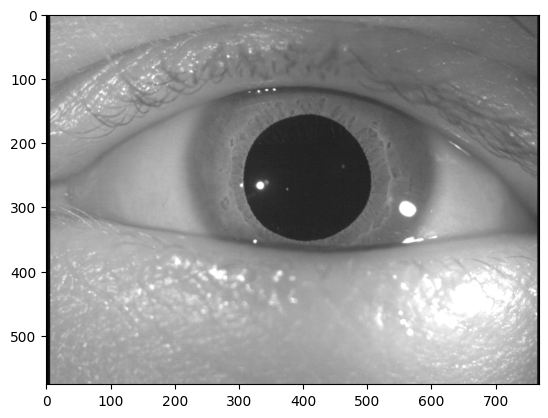

In [3]:
# Show images in graylevel
plt.set_cmap('gray')
plt.imshow(data)

## Calculate and show the histogram ##

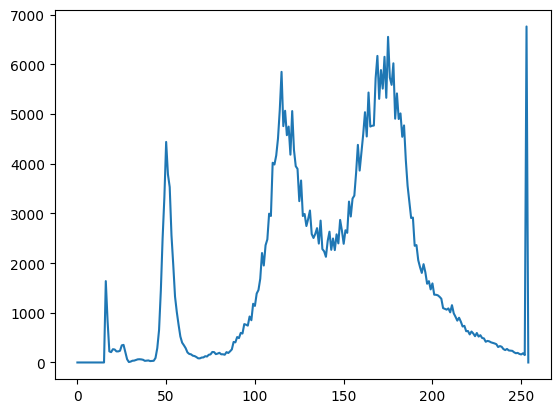

In [4]:
histo = np.histogram(data, bins=np.arange(0,256))

# Note the number of data is one less than the number of box-edges for the histogram
plt.plot(histo[1][:-1], histo[0])

## Convert to black-and-white ##

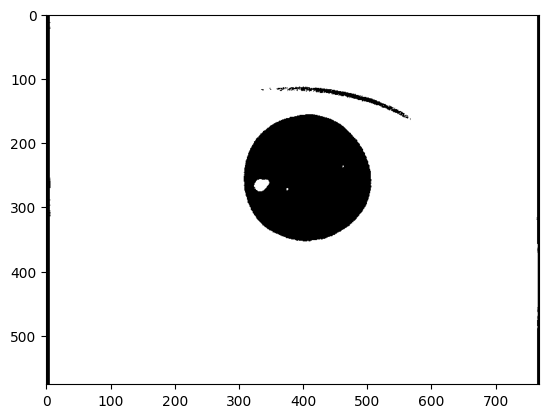

In [5]:
# for convenience, I choose the threshold automatically
bw = data > 80

plt.imshow(bw)

## Fill the holes ##

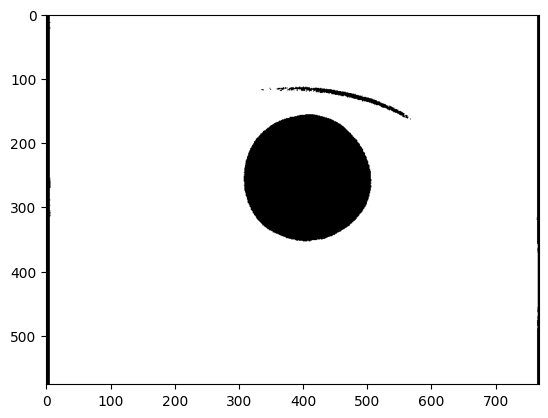

In [6]:
filled = np.invert(scipy.ndimage.binary_fill_holes(np.invert(bw)))

plt.imshow(filled)

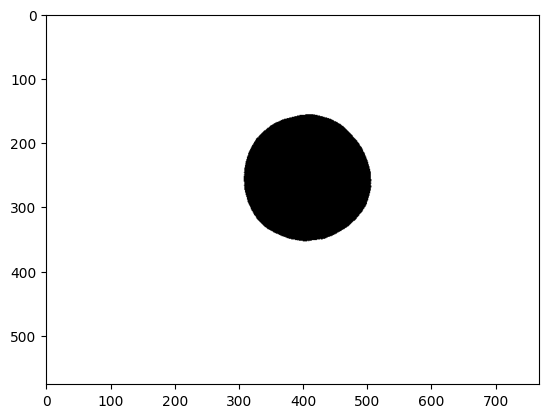

In [7]:
se = morphology.disk(10)
closed = morphology.closing(filled, se)

plt.imshow(closed)

## Find the edge ##

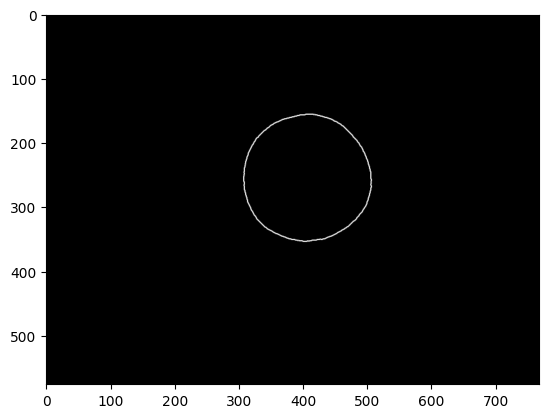

In [8]:
edges = skimage.filters.sobel(closed)

plt.imshow(edges)

[ImgProc_4a_FindPupil_OpenCV.ipynb](ImgProc_4a_FindPupil_OpenCV.ipynb)<img src="data/images/Backward.png" align="middle"> 

    Author: Thomas Haslwanter
    Date: Feb 20, 2023

<img src="data/images/CCA_40.png">

This IPYNB-notebook  is licensed under a Creative Commons Attribution 4.0 International License.